In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pylab import show, hist, subplot, figure

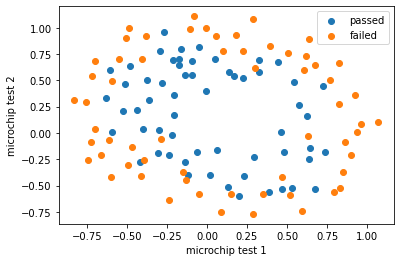

In [68]:
data = pd.read_csv('microchip_data.csv')
data1=pd.read_csv('Data22.txt',header=None)
x=data1.iloc[:,0:2]
y=data1.iloc[:,2]
mask=y==1
passed=plt.scatter(x[mask][0].values,x[mask][1].values)
failed=plt.scatter(x[~mask][0].values,x[~mask][1].values)
plt.xlabel('microchip test 1')
plt.ylabel('microchip test 2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [69]:
Y=data.iloc[:,2].values
X=data.iloc[:,:2].values
data=data.sample(frac=1)
data=data.reset_index(drop=True)

In [70]:
pi=3.14
def gaussian(u1, u2):
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * pi * u2)+2
    return z1, z2

In [71]:
y=np.array(Y)
y.reshape(-1,1)
u1 = np.random.rand(1000)
u2 = np.random.rand(1000)
z1, z2 = gaussian(u1, u2)

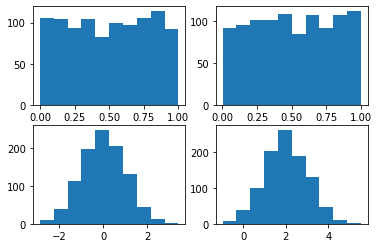

In [72]:
figure()
subplot(221) 
hist(u1)     
subplot(222)
hist(u2)
subplot(223) 
hist(z1)
subplot(224)
hist(z2)
show()

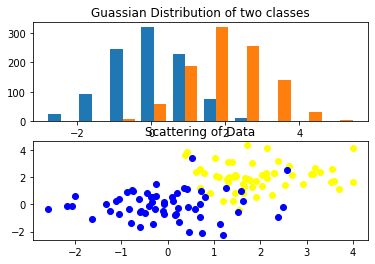

In [73]:
x1=[]
x2=[]
n=Y.shape[0]
for i in range(n):
    if Y[i]==1:
        x1.append(random.choice(z2))
        x2.append(random.choice(z2))
    else:
        x1.append(random.choice(z1))
        x2.append(random.choice(z1))
X=np.c_[x1,x2]
X_new = np.c_[z1, z2]
data_new = np.c_[X, y]  
subplot(211)
hist(X_new)
plt.title('Guassian Distribution of two classes')
Y = Y.reshape(-1, 1)   
subplot(212)
plt.title('Scattering of Data')
pos_data = data_new[data_new[:,-1]==1]
neg_data = data_new[data_new[:,-1]==0]
plt.scatter(pos_data[:,0], pos_data[:,1], color="yellow")
plt.scatter(neg_data[:,0], neg_data[:,1], color="blue")

In [74]:
train_size = int((n * 7) / 10)
X_train_indices = random.sample(range(0, X.shape[0]), train_size)
X_train, X_test, Y_train, Y_test = [], [], [], []
for i in range(X.shape[0]) :
    if(i in X_train_indices) :
        X_train.append(X[i])
        Y_train.append(Y[i])
    else :
        X_test.append(X[i])
        Y_test.append(Y[i])

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [75]:
phi=sum(Y_train)/len(Y_train)
print("phi: "+str(phi))

phi: [0.45679012]


In [76]:
mu0=[0,0]
mu1=[0,0]
c0=0
c1=0
for i in range(len(Y_train)):
    if Y_train[i]==0:
        c0+=1
        mu0+=X_train[i]
    else:
        c1+=1
        mu1+=X_train[i]
mu0/=c0
mu1/=c1
print("mu0: "+str(mu0))
print("mu1: "+str(mu1))

mu0: [-0.03136938  0.10588866]
mu1: [1.94018768 1.96941873]


In [77]:
m = len(Y_train)
sigma = np.zeros((2,2))
for i in range(m):
    xi=X_train[i]
    yi=Y_train[i]
    if yi==1:
        temp=xi-mu1
        temp=temp.reshape(-1,1)
        temp1=np.transpose(temp)
        sqr=(temp)*(temp1)
        sigma = sigma + sqr
sigma=sigma/m
print("sigma: "+str(sigma))
def calculate_px_y(x,mu):
    n = len(mu)
    det=np.linalg.det(sigma)
    pi = 3.14
    inverse=np.linalg.inv(sigma)
    den=pow(2*pi,n/2)*np.sqrt(det)
    temp=x-mu
    temp=temp.reshape(-1,1)
    temp1=np.transpose(temp)
    p=np.dot(np.dot(temp1,inverse),temp)
    p=(-0.5)*p
    num=np.exp(p)
    return num/den
def calculate_py(y):
    if y==1:
        return phi
    else:
        return (1-phi)
def predictor(x):
    p_0 = calculate_px_y(x,mu0)*calculate_py(0)
    p_1 = calculate_px_y(x,mu1)*calculate_py(1) 
    if p_0>p_1:
        return 0
    else:
        return 1 
correct=0;
predictions=[]
l=len(Y_test)
for i in range(l):
    x=X_test[i]
    y=Y_test[i]
    y_predicted=predictor(x)
    predictions.append(y_predicted)
    if predictions[i]==y:
        correct+=1
print("Correct Predictions: " + str(correct) + " ,Out of: "+ str(l))
print("Accuracy: ",100*correct/l)

sigma: [[0.40878156 0.03526994]
 [0.03526994 0.45910151]]
Correct Predictions: 33 ,Out of: 36
Accuracy:  91.66666666666667


In [78]:
#We can clearly see that second has better accuracy then the first